In [1]:
%matplotlib inline
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
random_state = 6
np.random.seed(random_state)

### Import data

In [56]:
## look data with pandas
train_file = "data/rupturemodel_train.txt"
val_file = "data/rupturemodel_xvalidate.txt"
test_file = "data/rupturemodel_test.txt"

df = pd.read_csv(train_file, sep=" ", header = None)
df_val= pd.read_csv(val_file, sep=" ", header = None)
df_test= pd.read_csv(test_file, sep=" ", header = None)

columns = ['height', 'width', 'sxx', 'sxy', 'syy', 'sdrop', 'mud', 'dc', 'value']

df.columns = columns
df_val.columns = columns
df_test.columns = columns

df = df.append(df_val)
df = df.append(df_test)

### Data processing
We use StandardScaler preprocessing method of scikit. It standardizes features 
by removing the mean and scaling to unit variance

In [57]:
from keras.utils import to_categorical

mms = StandardScaler()
X = mms.fit_transform(df.drop('value', axis=1))
Y = df['value'].values
X, Y = shuffle(X, Y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X.shape)
print(Y.shape)

print(X_train.shape)
print(Y_train.shape)

(2000, 8)
(2000,)
(1600, 8)
(1600,)


### Import different algorithoms

In [58]:
#import different algorithoms to compare with each other
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Run models

In [59]:
# prepare models
seed = 7
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(n_estimators = 10, max_depth = 5, criterion ='entropy', max_features='sqrt')))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.763000 (0.021119)
LDA: 0.758000 (0.018868)
KNN: 0.736000 (0.028355)
CART: 0.661500 (0.025105)
NB: 0.760000 (0.021679)
RFC: 0.763000 (0.023473)
SVM: 0.771000 (0.025377)


### Ploting

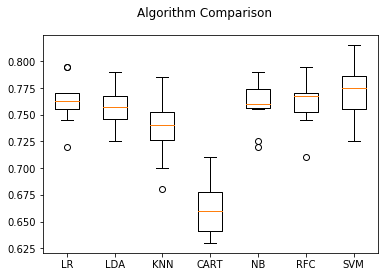

In [60]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()